# 環境セットアップ & 練習問題

本日の講義では、２回目以降の講座で必要な環境構築と基本的なPythonライブラリの操作方法の確認を行います。  
基本的な操作に問題が無い方は、後半の練習課題に取り組んでみてください。

## Agenda
* 基本的なPythonライブラリ
    * [Jupyter Notebook](#Jupyter-Notebook)
    * [Pandas](#Pandas)
    * [Scikit learn](#Scikit-learn)
* (Optional)練習問題
    * [線形回帰モデルの改善](#線形回帰モデルの改善)
    * [アヤメの分類](#アヤメの分類)
    * [Deep Neural Networkモデル](#Deep-Neural-Networkモデル)

## 基本的なPythonライブラリ
データ分析や機械学習プロジェクトで使われるPythonライブラリの基本的な操作の確認をしていきます。

### Jupyter Notebook
[Jupyter Notebook](http://jupyter.org/) はWeb GUIからプログラムの記述/実行を実行結果と共に**Notebook**形式で保存することが出来るツールで、 データ分析作業を探索的に進める際によく使われています。  
またMarkdown形式でテキストを書くこともできるので、分析の考察を記述したり構造化した文章を残すことが可能です。

* `Ctrl + Enter`: セル内のプログラムの実行
* `Shift + Enter`: 新しいセルの作成
* セルをダブルクリック: セルの編集
* プルダウンメニュー: セルの種類を変更

その他の操作については、[公式ドキュメント](http://jupyter-notebook.readthedocs.io/en/stable/)を参考にしてください。

### Pandas
[Pandas](http://pandas.pydata.org/) はデータを構造を確認したりファイルからデータを読むこんだりするためのツールで、データ分析や前処理によく利用されます。

#### データの読み込み
本日の講義でも紹介した、司法試験のデータを読み込んでみましょう。
csvファイルの読み込みは [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) を使って行います。 


```python
import pandas as pd

iris = pd.read_csv('../data/iris.csv')
```

#### データの表示
`read_csv`の返り値は [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) というpandasのオブジェクトです。  
DataFrameは行(rows)と列(columns)から構成された2次元データで、行列操作や集計を行うことが出来ます。  
[`head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html#pandas.DataFrame.head), [`sample`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html) を使ってデータを表示してみましょう。  
また何もAPIを指定しないとデータ全件が表示されます。


```python
# 先頭のデータをn件表示
df.head()
df.head(10)
```

```python
# ランダムにデータをn件表示
df.sample()
df.sample(5)
```

```python
# 全件表示
df
```

カラム名を指定することで、特定のカラムのみを表示することが出来ます。

```python
# Scoreカラムの先頭データだけ表示
iris['sepal_length'].head()
```

#### 統計データの表示
DataFrameには[`describe`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)というAPIが用意されており、サンプル数・平均・標準偏差・パーセンタイル・最大・最小などのデータをカラム毎に簡単に取得することが出来ます。

```python
iris.describe()
```

#### データの可視化
Pandasは[Matplotlib](https://matplotlib.org/)というツールを使ってデータの可視化を行うことも出来ます。  
例えばヒストグラムを見たいときは [`hist`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.hist.html) を使います。

```python
%matplotlib inline

iris['sepal_length'].hist()
```

散布図の表示には[`scatter`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.scatter.html)を使います。

```python
shiho = pd.read_csv('../data/shiho.csv')
shiho.plot.scatter(x='score', y='count')
```

## Scikit-learn
[Scikit-learn](http://scikit-learn.org/)は基本的な機械学習アルゴリズムの実装が提供されているライブラリになります。 
今回の講義にも登場した司法試験データを使って簡単なモデルを学習させてみましょう。

### データセット
Schikit learnにはオープンデータを読み込むAPIも用意されています。今回は[`Boston house prices`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)という米国ボストン市郊外における地域別の住宅価格のデータセットを使用して、価格を予測するモデルを学習したいと思います。

```python
from sklearn.datasets import load_boston

# データの読み込み
boston = load_boston()

# DataFrameでfeatureを確認
pd.DataFrame(boston.data, columns=boston.feature_names)

# ターゲット(価格)を確認
targets = pd.Series(boston.target)
targets.head()
```

### データ分割
データセットを学習とテスト用に分割するためには [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)を使います。

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
```

### モデルの学習
今回はシンプルな線形回帰モデルを[`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)クラスを使って行います。

```python
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# モデルの初期化
model = LinearRegression() 

# 学習
model.fit(X_train, y_train)

# 予測
predicted = model.predict(X_test)
expected = y_test

# 結果の可視化
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()
```

## (Optional) 練習課題
環境構築や基本的なライブラリの操作が確認出来た方は、以下の課題に取り組んでみましょう。

### 線形回帰モデルの改善
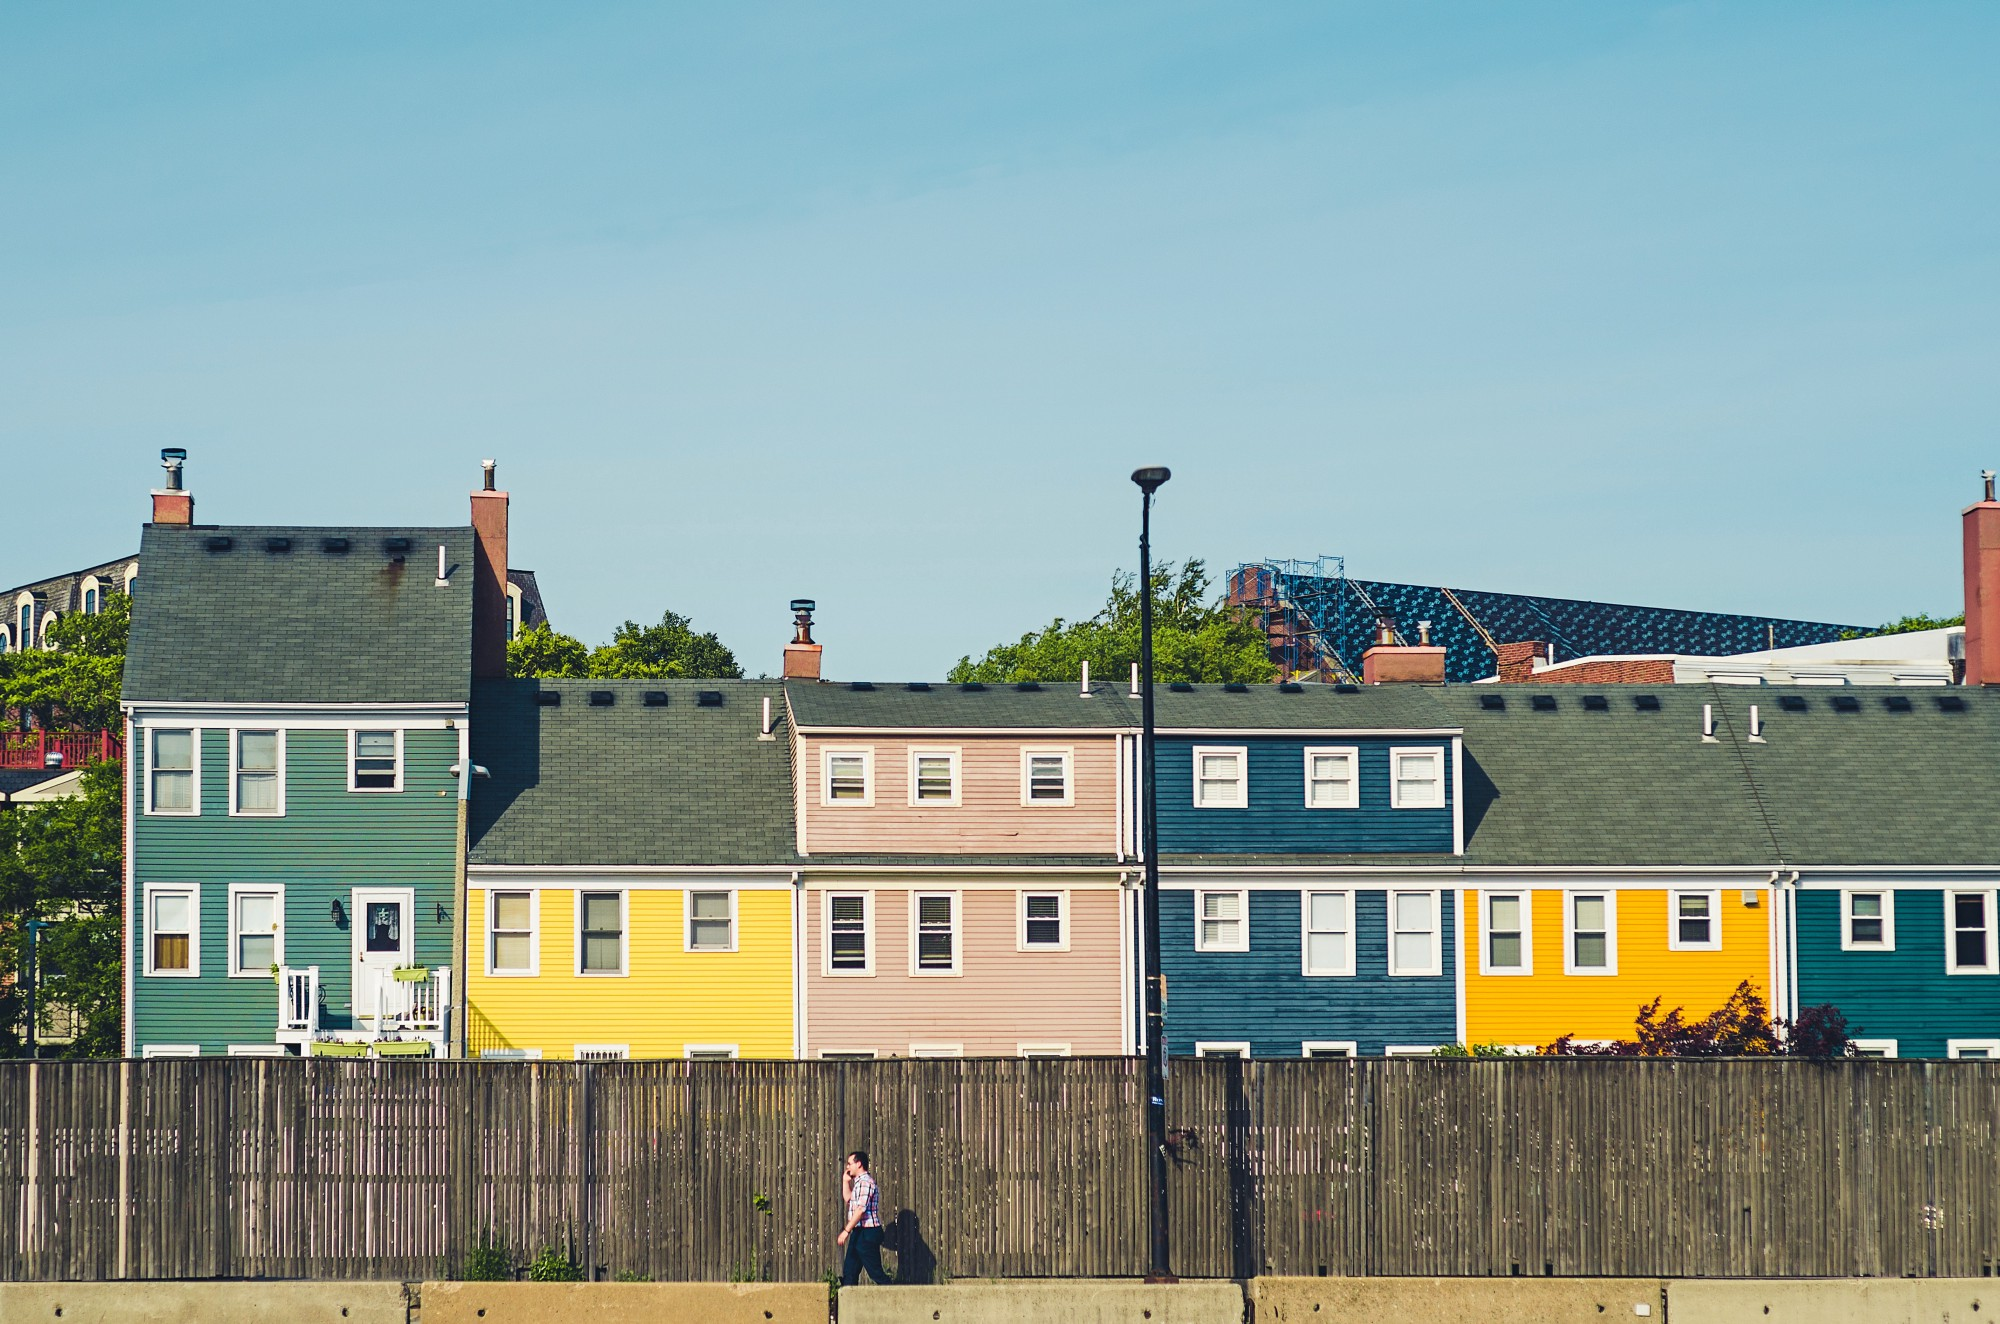

上記のBoston house pricesデータを使ったエクササイズではシンプルな線形回帰モデルを試しました。  
Scikit learn に実装されている他の回帰モデルも、試して結果を比較してみましょう。

- [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
- [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
- [Polynomial Regression](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

### アヤメの分類
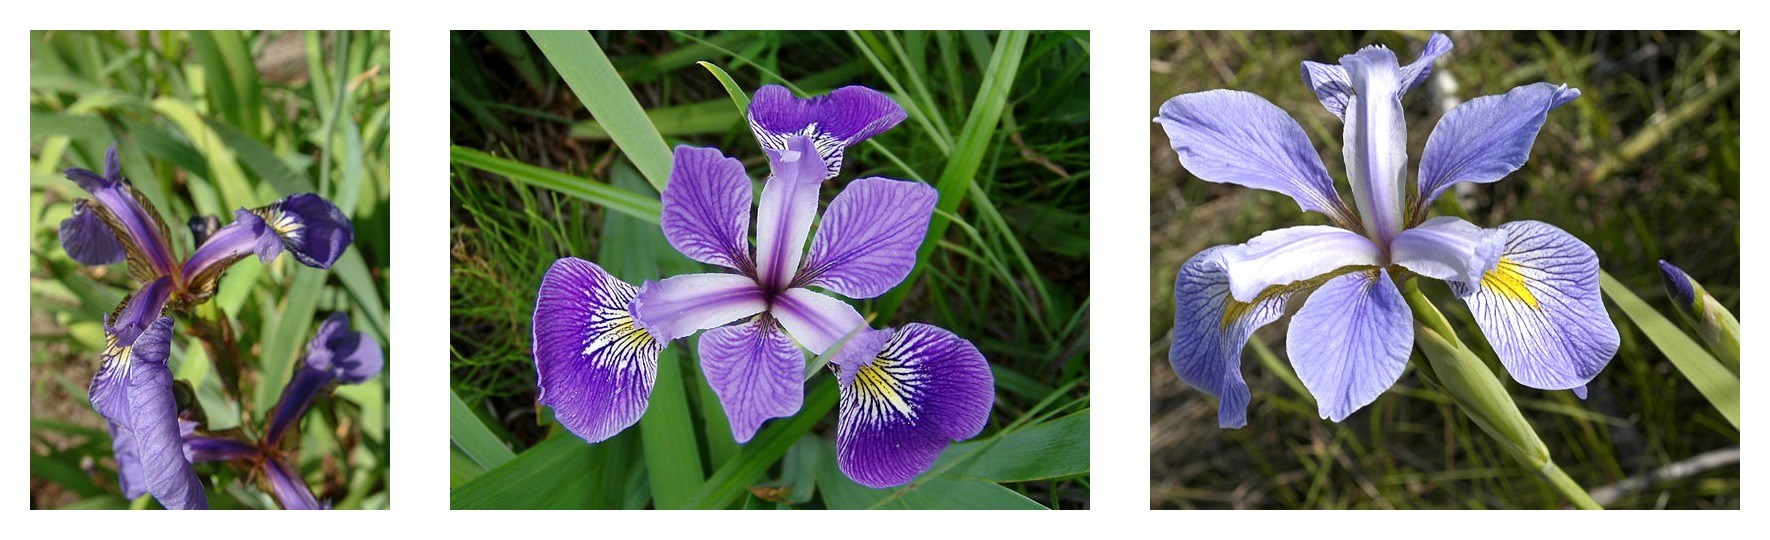

上記で使用した、アヤメのデータ(`iris.csv`)を使ってアヤメの種類の分類モデルを学習してみましょう。

* [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

参考記事
* [scikit-learnのSVMでirisデータセットを分類](https://note.nkmk.me/python-scikit-learn-svm-iris-dataset/)
* [irisデータをロジスティック回帰とSVMで分類してみた](http://kotaroito.hatenablog.com/entry/2016/03/23/225712)

### Deep Neural Networkモデル


Deep neural network を使ってアヤメの分類タスクを行うことも可能です。  
[Tensorflowのチュートリアル](https://www.tensorflow.org/get_started/premade_estimators#classifying_irises_an_overview)でも説明されているので、余力がある方は試してみましょう。

* [Deep Neural Network Classifier](https://www.tensorflow.org/api_docs/python/tf/estimator/DNNClassifier)